In [4]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms

In [5]:
library(factoextra) # clustering algorithms & visualization

In [6]:
df <- read.csv('df_clusters.csv', header=TRUE)

In [9]:
head(df)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,cluster_3,label,cluster_6,cluster_8,cluster_16
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
13.9,13.7,13.8,14.7,14.8,14.1,14.0,15.2,15.7,15.6,16.0,2,1,0,0,2
14.8,14.1,14.0,15.2,15.7,15.6,16.0,16.1,15.3,15.6,15.8,2,1,0,0,2
15.7,15.6,16.0,16.1,15.3,15.6,15.8,15.9,16.2,16.3,15.7,2,1,0,3,2
15.1,14.7,13.8,13.6,14.1,14.7,14.9,14.9,15.5,16.2,16.3,2,1,0,0,2
13.6,14.1,14.7,14.9,14.9,15.5,16.2,16.3,15.9,15.7,15.3,2,1,0,0,2
13.1,14.1,15.1,14.5,14.6,15.8,16.4,16.6,16.3,16.1,16.3,2,1,0,0,2


In [8]:
df <- df[, 1:11]

In [31]:
k6 <- kmeans(df_raw, centers = 6, nstart = 25)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-T


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



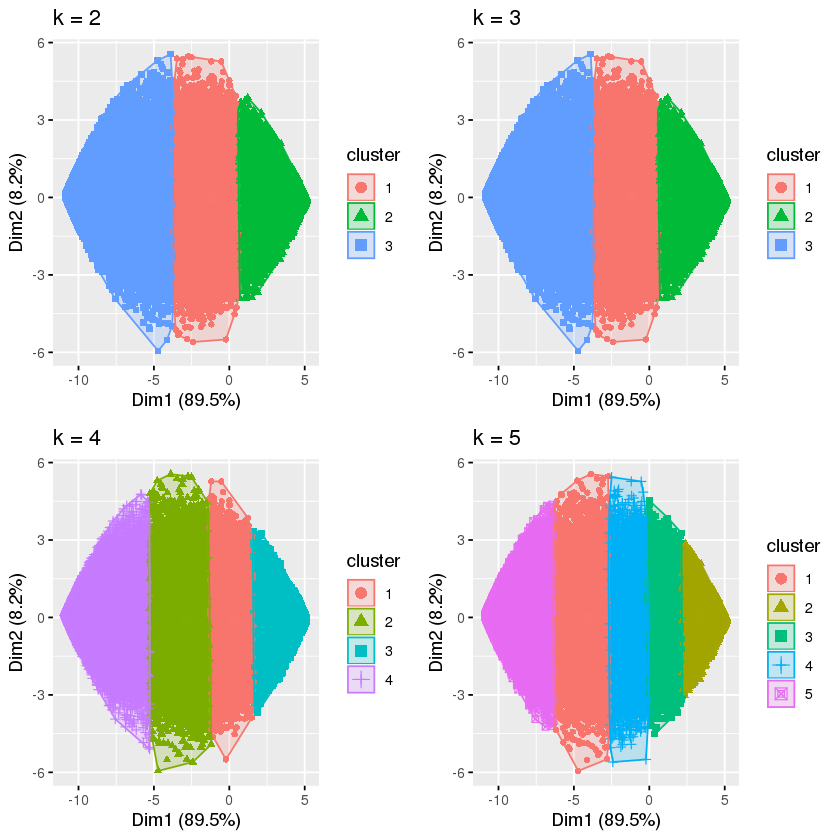

In [35]:
df=df_raw
k3 <- kmeans(df, centers = 3, nstart = 25)
k4 <- kmeans(df, centers = 4, nstart = 25)
k5 <- kmeans(df, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df) + ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)

## Determing optimal clusters

### Elbow method

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-T

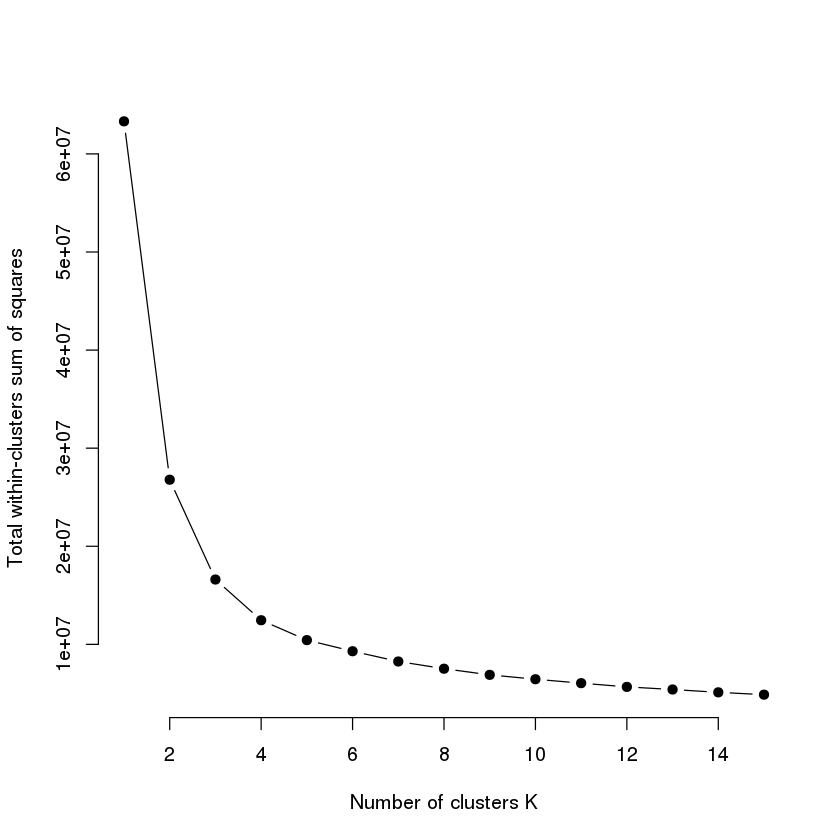

In [41]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

### Average Silhouette Method

In [9]:
# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- kmeans(df, centers = k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(df))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:15

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

ERROR: Error: cannot allocate vector of size 158.3 Gb
